In [ ]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns
#import scipy.stats
import scipy.stats as stats
from scipy.stats import f_oneway
color = sns.color_palette()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### **load** **data** **and take a quick look at each DataFrame** 

In [3]:
path = "/content/drive/My Drive/Colab Notebooks/data/"

aisles = pd.read_csv(path+'aisles.csv')
departments = pd.read_csv(path+'departments.csv')
products = pd.read_csv(path+'products.csv')
orders = pd.read_csv(path+'orders.csv')
order_products_train = pd.read_csv(path+'order_products__train.csv')
order_products_prior = pd.read_csv(path+'order_products__prior.csv')

In [4]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [6]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
orders.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


'days_since_prior_order' is NA for the first order each user made.

In [8]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [9]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


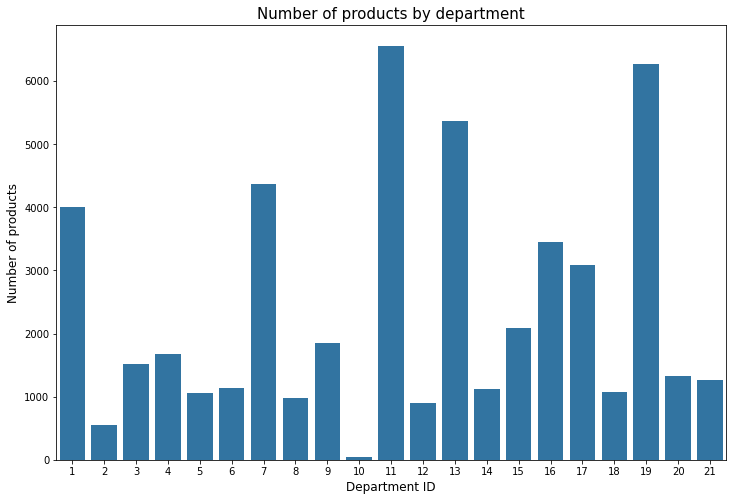

In [ ]:
# check the number of products in each department
plt.figure(figsize=(12,8))
sns.countplot(x="department_id", data=products, color=color[0])
plt.ylabel('Number of products', fontsize=12)
plt.xlabel('Department ID', fontsize=12)
plt.xticks(rotation='horizontal')
plt.title("Number of products by department", fontsize=15)
plt.show()

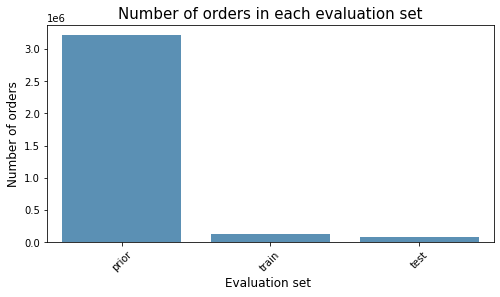

,Number_of_orders
eval_set,
prior,3214874
test,75000
train,131209


In [10]:
# check the number of orders in each evaluation set
orders_in_each_eval_set = orders['eval_set'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(orders_in_each_eval_set.index, orders_in_each_eval_set.values, alpha=0.8, color=color[0])
plt.ylabel('Number of orders', fontsize=12)
plt.xlabel('Evaluation set ', fontsize=12)
plt.title('Number of orders in each evaluation set', fontsize=15)
plt.xticks(rotation=45)
plt.show()

orders.groupby('eval_set')['order_id'].count().to_frame('Number_of_orders')

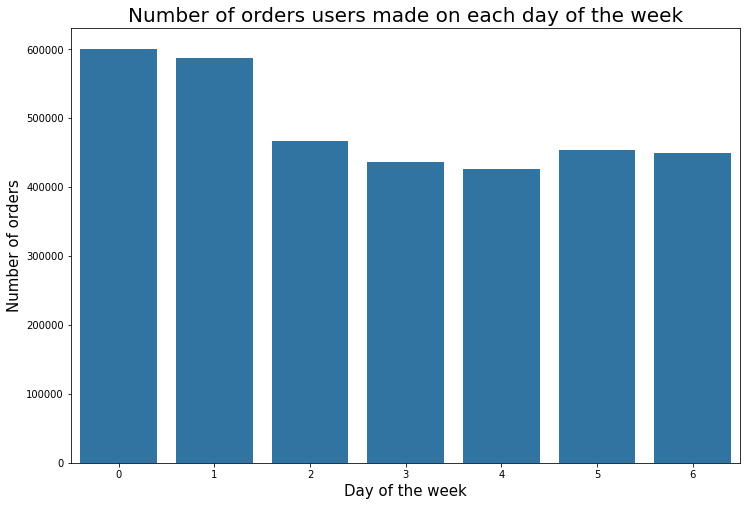

In [ ]:
# what time and day do users make purchase

plt.figure(figsize=(12,8))

sns.countplot(x="order_dow", data=orders,color=color[0])

plt.ylabel('Number of orders', fontsize=15)
plt.xlabel('Day of the week', fontsize=15)
plt.title('Number of orders users made on each day of the week', fontsize=20)
plt.show()

Users prefered to place orders on Saturday and Sunday.

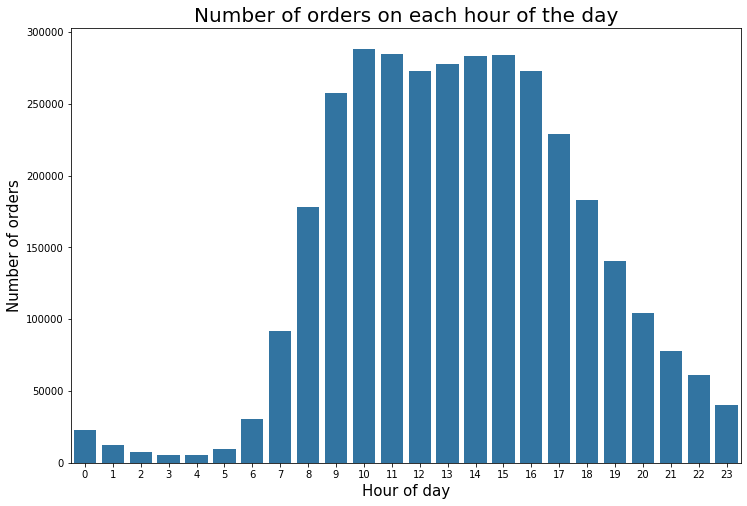

In [ ]:
plt.figure(figsize=(12,8))

sns.countplot(x="order_hour_of_day", data=orders,color=color[0])

plt.ylabel('Number of orders', fontsize=15)
plt.xlabel('Hour of day', fontsize=15)
plt.title('Number of orders on each hour of the day', fontsize=20)
plt.show()

Time between 10AM and 17PM is the most popular time to place orders.

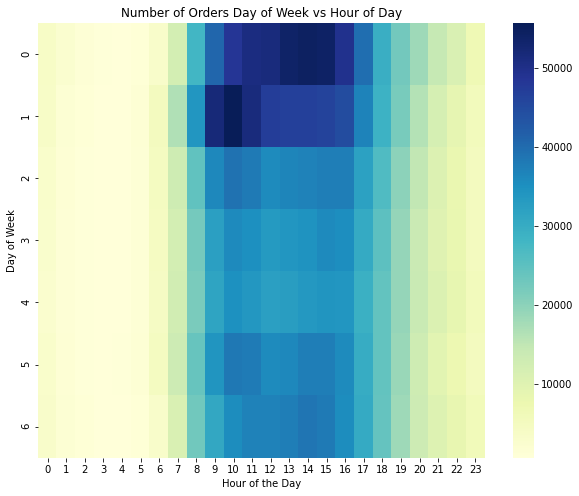

In [ ]:
group_hour_dow = orders.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
group_hour_dow = group_hour_dow.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(10,8))

sns.heatmap(group_hour_dow,cmap='YlGnBu')

plt.ylabel('Day of Week')
plt.xlabel('Hour of the Day')
plt.title('Number of Orders Day of Week vs Hour of Day')
plt.show()

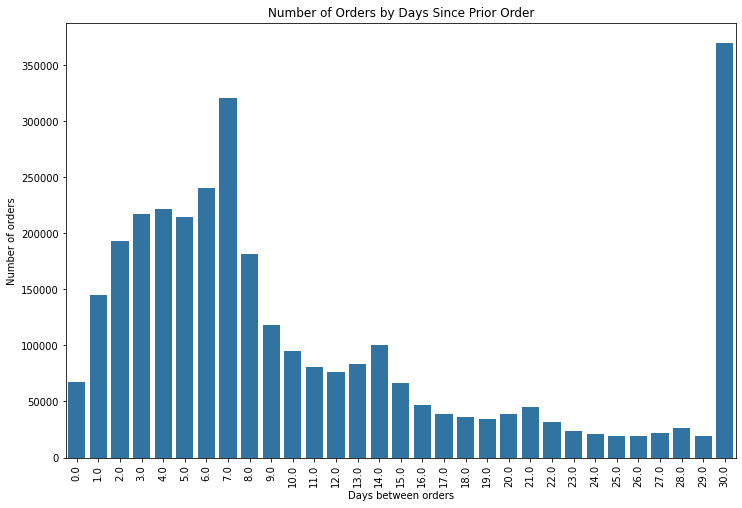

In [ ]:
# check number of orders by days between orders
plt.figure(figsize=(12,8))

sns.countplot(x='days_since_prior_order', data=orders[orders['order_number']!=1],color=color[0])

plt.ylabel('Number of orders')
plt.xlabel('Days between orders')
plt.xticks(rotation='vertical')
plt.title('Number of Orders by Days Since Prior Order')
plt.show()

lots of users order once in every week (local peak at 7 days). We can also see smaller local peaks at 14, 21 and 28 days. There seems to be a cut off value of 30 days for days since prior order.

In [ ]:
#merge orders and order_products_prior dataframe
prior_products = pd.merge(orders[orders['eval_set'] == 'prior'],
                    order_products_prior,on='order_id')
prior_products.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
5,2398795,1,prior,2,3,7,15.0,196,1,1
6,2398795,1,prior,2,3,7,15.0,10258,2,0
7,2398795,1,prior,2,3,7,15.0,12427,3,1
8,2398795,1,prior,2,3,7,15.0,13176,4,0
9,2398795,1,prior,2,3,7,15.0,26088,5,1


In [ ]:
#merge orders and order_products_train dataframe
train_products = pd.merge(orders[orders['eval_set'] == 'train'],
                    order_products_train,on='order_id')
train_products.head(20)

In [ ]:
#proportion of reordered products in prior orders
order_products_prior['reordered'].sum()/ order_products_prior['reordered'].count()

0.5896974667922161

In [ ]:
#proportion of reordered products in train orders
order_products_train['reordered'].sum()/ order_products_train['reordered'].count()

0.5985944127509629

In [ ]:
#proportion of orders containing reordered products in prior orders
order_products_prior.groupby('order_id')['reordered'].agg('max').sum()/order_products_prior.groupby('order_id')['reordered'].agg('max').count()

0.8791514068669565

In [ ]:
#proportion of orders containing reordered products in train orders
order_products_train.groupby('order_id')['reordered'].agg('max').sum()/order_products_train.groupby('order_id')['reordered'].agg('max').count()

0.9344404728334185

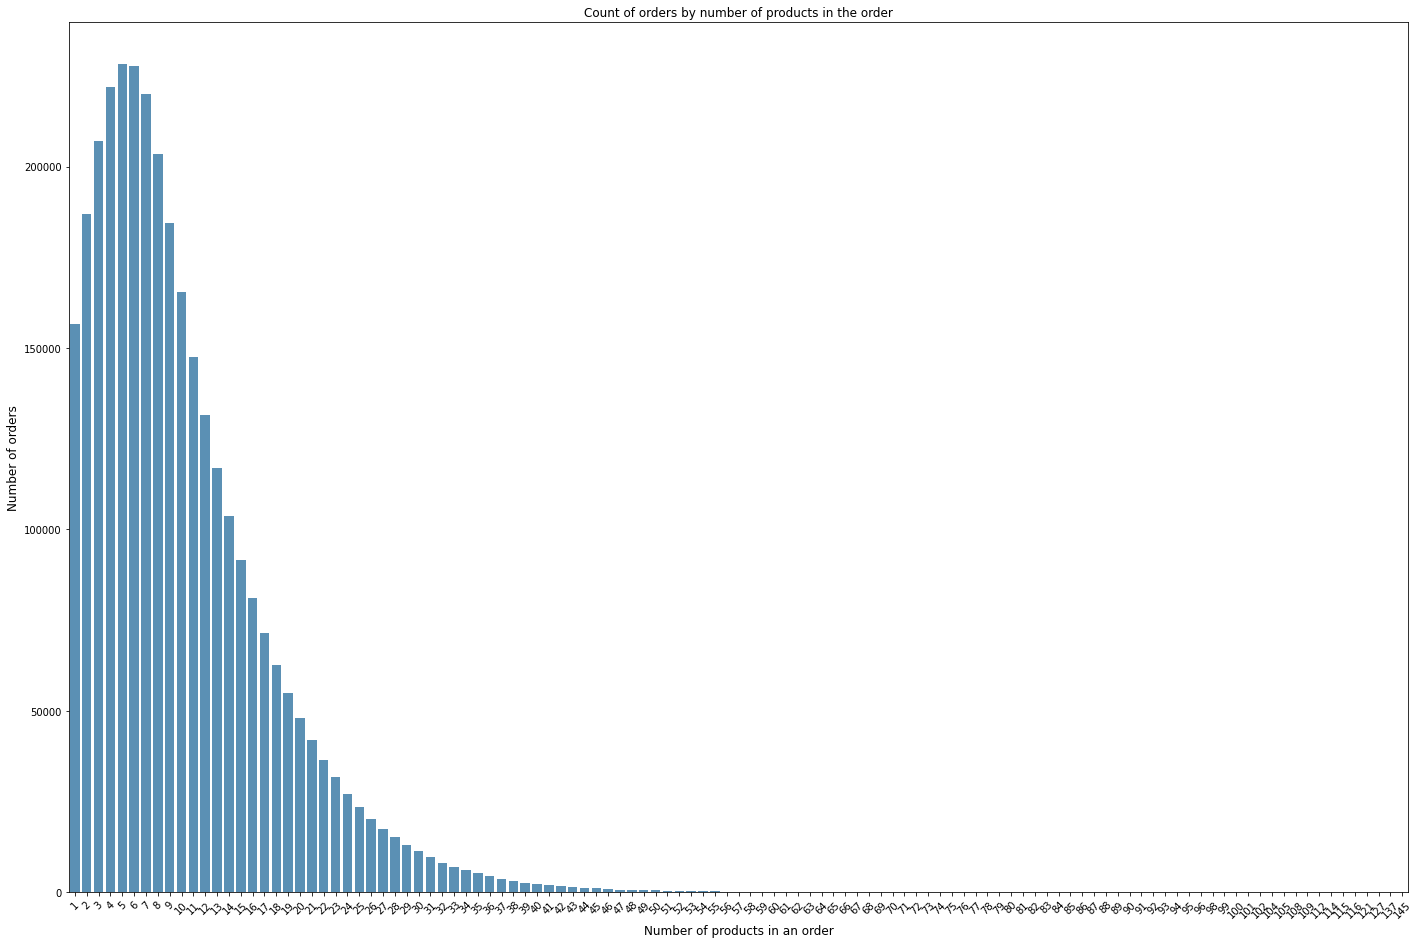

In [ ]:
# number of products in each order in prior data
grouped_df = order_products_prior.groupby('order_id')['add_to_cart_order'].agg('max').reset_index()
cnt_srs = grouped_df['add_to_cart_order'].value_counts()

plt.figure(figsize=(24,16))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8,color=color[0])
plt.ylabel('Number of orders', fontsize=12)
plt.xlabel('Number of products in an order', fontsize=12)
plt.xticks(rotation='45')
plt.title('Count of orders by number of products in the order')
plt.show()

In [ ]:
grouped_df['add_to_cart_order'].median()

8.0

In [ ]:
grouped_df['add_to_cart_order'].mode()

0    5
dtype: int64

This is a right-skewed distribution, the mode is 5, the median is 8.

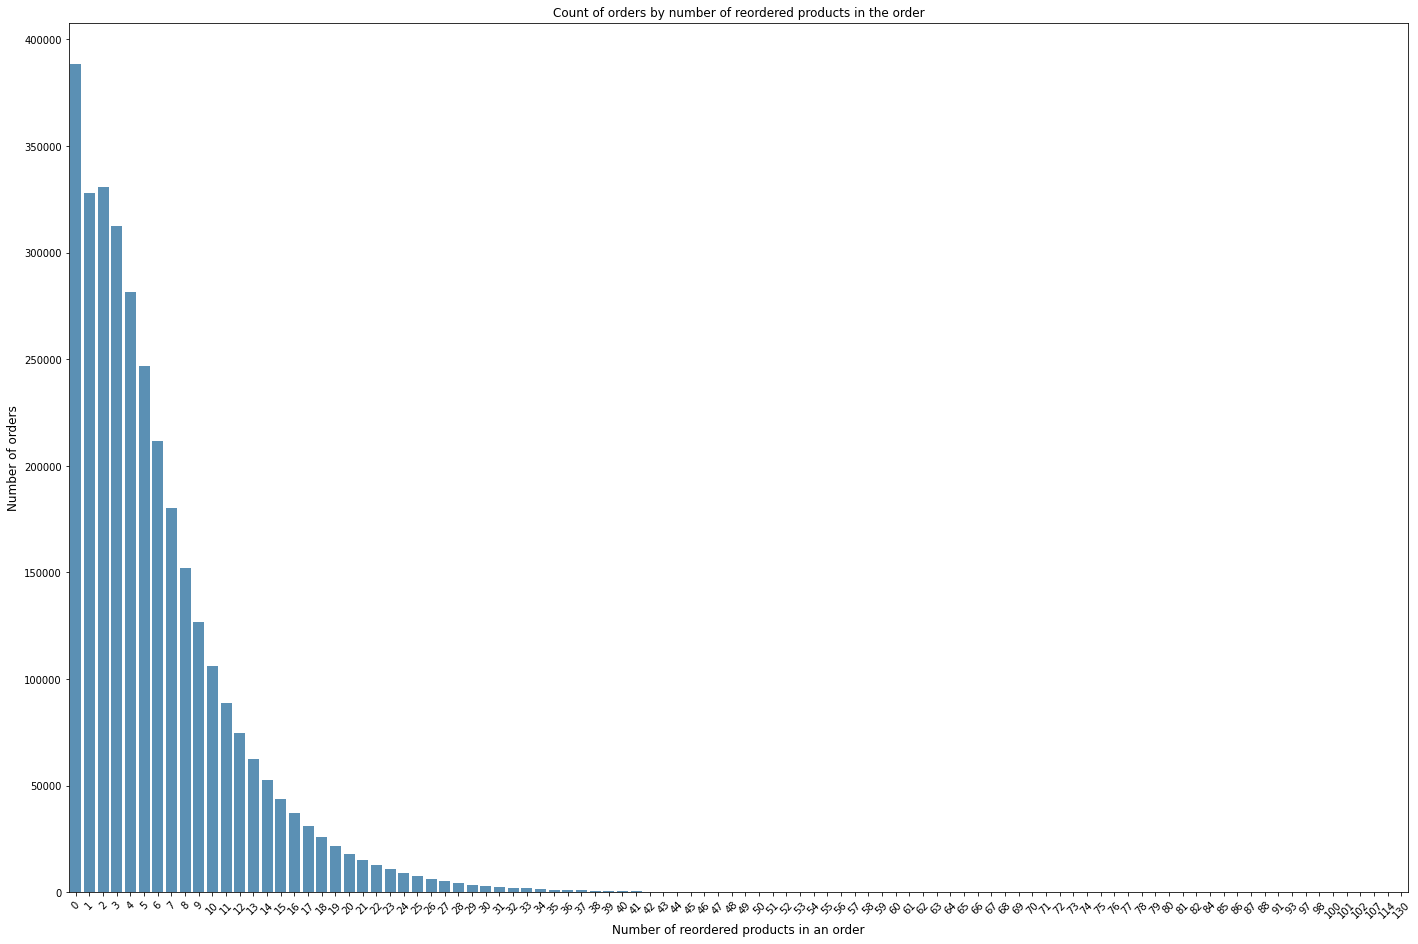

In [ ]:
#number of reordered products in each order

grouped_orders_prior = order_products_prior.groupby('order_id')['reordered'].sum().reset_index()
cnt_grouped_orders_prior = grouped_orders_prior['reordered'].value_counts()

plt.figure(figsize=(24,16))
sns.barplot(cnt_grouped_orders_prior.index, cnt_grouped_orders_prior.values, alpha=0.8,color=color[0])
plt.ylabel('Number of orders', fontsize=12)
plt.xlabel('Number of reordered products in an order', fontsize=12)
plt.xticks(rotation='45')
plt.title('Count of orders by number of reordered products in the order')
plt.show()

In [ ]:
grouped_orders_prior['reordered'].mode()

0    0
dtype: int64

In [ ]:
grouped_orders_prior['reordered'].median()

4.0

right skewed, mode = 0, median = 4.

Is there any difference in number of reordered products in an order by the hour of the day or the day of the week?

In [ ]:
prior_products.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [ ]:
# group orders by 'order_id'
grouped_orders_time_prior = prior_products.groupby('order_id')['order_hour_of_day','order_dow'].agg('min').reset_index()
grouped_orders_time_prior.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,order_id,order_hour_of_day,order_dow
0,2,9,5
1,3,17,5
2,4,9,1
3,5,16,6
4,6,12,1


In [ ]:
grouped_orders_prior.head()

,order_id,reordered
0,2,6
1,3,8
2,4,12
3,5,21
4,6,0


In [ ]:
grouped_orders_time_prior_merge = pd.merge(grouped_orders_prior,grouped_orders_time_prior,on='order_id')
grouped_orders_time_prior_merge.head()

,order_id,reordered,order_hour_of_day,order_dow
0,2,6,9,5
1,3,8,17,5
2,4,12,9,1
3,5,21,16,6
4,6,0,12,1


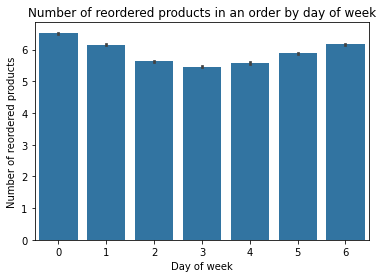

In [ ]:
sns.barplot(x='order_dow', y='reordered', data=grouped_orders_time_prior_merge,color=color[0])
plt.title('Number of reordered products in an order by day of week')
plt.xlabel('Day of week')
plt.ylabel('Number of reordered products')
plt.show()

In [ ]:
orders_by_dow = [grouped_orders_time_prior_merge[grouped_orders_time_prior_merge['order_dow']==x]['reordered'] for x in range(7)]
orders_by_dow

In [ ]:
orders_by_dow[0].values

array([10,  0,  2, ..., 26,  6,  4])

In [ ]:
values = [x.values for x in orders_by_dow]

In [ ]:
f_oneway(values[0],values[1],values[2],values[3],values[4],values[5],values[6])

F_onewayResult(statistic=2060.693921898992, pvalue=0.0)

The statistical results show significant difference (p < 0.05, reject the null hypothesis) in number of reordered products in an order between different day of week. 

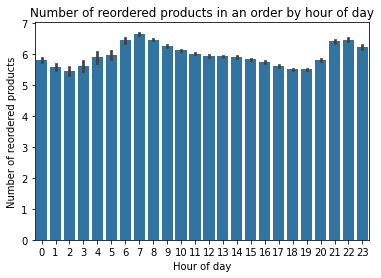

In [ ]:
sns.barplot(x='order_hour_of_day', y='reordered', data=grouped_orders_time_prior_merge,color=color[0])
plt.title('Number of reordered products in an order by hour of day')
plt.xlabel('Hour of day')
plt.ylabel('Number of reordered products')
plt.show()

In [ ]:
orders_by_hour_of_day = [grouped_orders_time_prior_merge[grouped_orders_time_prior_merge['order_hour_of_day']==x]['reordered'] for x in range(24)]
orders_by_hour_of_day

In [ ]:
values1 = [x.values for x in orders_by_hour_of_day]
len(values1)

In [ ]:
f_oneway(values1[0],values1[1],values1[2],values1[3],values1[4],values1[5],values1[6],values1[7],
         values1[8],values1[9],values1[10],values1[11],values1[12],values1[13],values1[14],values1[15],
         values1[16],values1[17],values1[18],values1[19],values1[20],values1[21],values1[22],values1[23]
         )

F_onewayResult(statistic=337.7331064318342, pvalue=0.0)

The statistical results show significant difference (p < 0.05, reject the null hypothesis) in number of reordered products in an order between different hour of day.